In [2]:
%matplotlib inline
%config Completer.use_jedi = False

In [203]:
BASE_PATH = "/Users/sergmiller/Downloads/АУФ 4 Профессии/"
BASE_FILE = "INSTA NEW-{:02d}.png"

In [4]:
import os

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [238]:
img = plt.imread(os.path.join(BASE_PATH, BASE_FILE.format(1)))

In [241]:
img2 = plt.imread(os.path.join(BASE_PATH, BASE_FILE.format(5)))

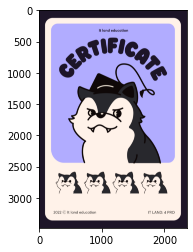

In [239]:
plt.imshow(img)

In [103]:
color = img[500][500]

In [149]:
color * 255

array([177., 172., 255., 255.], dtype=float32)

In [127]:
def get_color_mask(img, color):
    return np.array((np.mean(img == color, axis=-1) == 1.0).reshape(img.shape[0], img.shape[1], -1).repeat(4,-1), dtype=np.float)

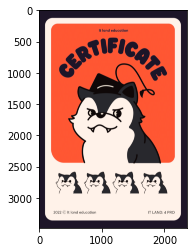

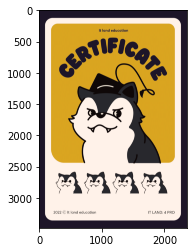

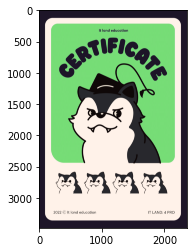

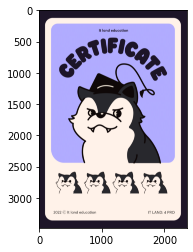

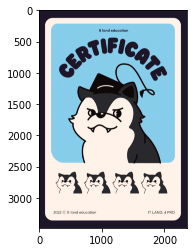

In [155]:
COLORS = ["orange", "yellow", "green", "purple", "blue"]

mask = get_color_mask(img, color)
colors = [
    [255, 87, 51],# orange
    [218,165,32], # gold
    [119,221,119], # green(pastel)
    [177., 172., 255.], #purple(Dima's)
    [135,206,235],# blue(sky)
]
for i,c in enumerate(colors):
    new_color = np.array(c + [255,], dtype=float) / 255
    pc = img *(1 - mask) +  new_color * mask
    plt.imshow(pc)
    plt.show()
    plt.imsave("wolf_backgrounds/{}.png".format(COLORS[i]), pc)

In [156]:
import pandas as pd

In [170]:
students = pd.read_csv(os.path.join(BASE_PATH, "students.tsv"), sep='\t', skiprows=1)

In [183]:
students.head()

,Имя,Направления,Почта,Ставим имя на NFT-дипломе? \n(если в столбце Имя - неправльное или неполное - укажите полное),Комментарий
0,Дмитрий,Дизайн,222.777@list.ru,False,NaN
1,Александра Ивасюк,Менеджер,aleksandra.iv95@mail.ru,True,Aleksandra Ivasiuk
2,Алексей Шишкин,"Ноу Код, Дизайн",alex-rave@yandex.ru,False,NaN
3,Анастасия Штольц,"Менеджер, Дизайн, Ноу Код",anast.shtolz@gmail.com,True,Anastasiia Shtolts
4,Андрей,"Разработчик, Ноу Код, Дизайн",andreyvktchebukin@gmail.com,False,NaN


In [329]:
TREKS = ["Дизайн", "Менеджер", "НоуКод", "Разработчик"]
TREK_ATTR_NAME = ["UX/UI", "PRODUCT", "NO-CODE", "DEV"]
TREKS2NAME = {t:a for t,a in zip(TREKS, TREK_ATTR_NAME)}

def get_treks(s):
    s = s.replace(' ', '').split(',')
    for c in s:
        assert c in TREKS, c
    return [t in s for t in TREKS]

In [330]:
students["treks"] = [get_treks(v) for v in students["Направления"].values]

In [186]:
students["Ставим имя на NFT-дипломе? \n(если в столбце Имя - неправльное или неполное - укажите полное)"].values

array([False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False])

In [201]:
students["Комментарий"].values

array([nan, 'Aleksandra Ivasiuk', nan, 'Anastasiia Shtolts', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, 'Khristina Stoyanova',
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       'Natalia Phoenix', 'Olya', 'Aleksandr Pervushin', nan, nan, nan,
       'Artem Smeianov', nan, nan, 'Iuliia Bulyndina', nan, nan, nan, nan,
       'Gleb Yakubets', nan], dtype=object)

In [287]:
from collections import Counter

Counter([np.sum(x) for x in students["treks"].values])

Counter({1: 14, 2: 16, 3: 7, 4: 5})

In [299]:
np.array(TREK_ATTR_NAME)[np.where(students['treks'].values[0])]

array(['DESIGN'], dtype='<U10')

In [297]:
np.array(students['treks'].values[0])

array([ True, False, False, False])

In [307]:
np.array(TREK_ATTR_NAME)[np.where(students['treks'].values[0])]

array(['DESIGN'], dtype='<U10')

In [335]:
def treks_to_rarity(trek_attrs):
    l = len(trek_attrs)
    assert l >= 1 and l <= 4
    if l == 4:
        return "MYTHIC_RARE"
    if l == 3:
        return "RARE"
    if l == 1:
        return "COMMON"
    if "NO-CODE" in trek_attrs and "UX/UI" in trek_attrs:
        return "UNCOMMON"
    return "UNCOMMON_SPECIAL"


RARITY_TO_COLOR = {
    "COMMON": "green",
    "UNCOMMON": "blue",
    "UNCOMMON_SPECIAL": "purple",
    "RARE": "yellow",
    "MYTHIC_RARE": "orange"
}

In [318]:
np.random.seed(42)
heads = np.random.randint(0, 2, students.shape[0])
bodys = np.random.randint(0, 6, students.shape[0])
print(heads, bodys)

[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0] [1 3 3 5 5 5 2 3 3 0 2 4 2 4 0 1 3 0 3 5 1 1 0 1 4 1 3 3 3 3 4 2 5 0 3 1 3
 1 5 5 5 1]


In [274]:
def get_mask_by_channel4(img):
    return np.array((img[:, :, 3] == 1).reshape(img.shape[0], img.shape[1], -1).repeat(4,-1), dtype=np.float)

In [280]:
def build_diploma(good_treks, bad_treks, bg, head, body):
    bg = plt.imread(FLAT_ATTRIBUTE_TO_FILE[bg])
    head = plt.imread(FLAT_ATTRIBUTE_TO_FILE[head])
    body = plt.imread(FLAT_ATTRIBUTE_TO_FILE[body])
    good_treks = [plt.imread(FLAT_ATTRIBUTE_TO_FILE[t]) for t in good_treks]
    bad_treks = [plt.imread(FLAT_ATTRIBUTE_TO_FILE[t]) for t in bad_treks]
    assert len(good_treks) > 0 and len(good_treks) + len(bad_treks) == 4
    im = bg
    for c in [head, body] + good_treks + bad_treks:
        c = c[:im.shape[0], :im.shape[1], :]
        mask = get_mask_by_channel4(c)
        im = im * (1-mask) + c * mask
    im = np.clip(im, 0, 1)
    return im

In [319]:
HEADS = ["classic", "style"]
BODYS = ["hoodie", "laptop", "phone", "smoothie", "wok", "coffee"]

FLAT_ATTRIBUTE_TO_FILE = {}

FLAT_ATTRIBUTE_TO_FILE["head_classic"] = os.path.join(BASE_PATH, BASE_FILE.format(5))
FLAT_ATTRIBUTE_TO_FILE["head_style"] = os.path.join(BASE_PATH, BASE_FILE.format(6))

FLAT_ATTRIBUTE_TO_FILE["body_hoodie"] = os.path.join(BASE_PATH, BASE_FILE.format(7))
FLAT_ATTRIBUTE_TO_FILE["body_laptop"] = os.path.join(BASE_PATH, BASE_FILE.format(8))
FLAT_ATTRIBUTE_TO_FILE["body_phone"] = os.path.join(BASE_PATH, BASE_FILE.format(9))
FLAT_ATTRIBUTE_TO_FILE["body_smoothie"] = os.path.join(BASE_PATH, BASE_FILE.format(10))
FLAT_ATTRIBUTE_TO_FILE["body_wok"] = os.path.join(BASE_PATH, BASE_FILE.format(11))
FLAT_ATTRIBUTE_TO_FILE["body_coffee"] = os.path.join(BASE_PATH, BASE_FILE.format(12))

for c in COLORS:
    FLAT_ATTRIBUTE_TO_FILE["bg_" + c] = "wolf_backgrounds/" + c + ".png"

FLAT_ATTRIBUTE_TO_FILE["good_DEV"] = os.path.join(BASE_PATH, BASE_FILE.format(13))
FLAT_ATTRIBUTE_TO_FILE["good_PRODUCT"] = os.path.join(BASE_PATH, BASE_FILE.format(14))
FLAT_ATTRIBUTE_TO_FILE["good_NO-CODE"] = os.path.join(BASE_PATH, BASE_FILE.format(15))
FLAT_ATTRIBUTE_TO_FILE["good_UX/UI"] = os.path.join(BASE_PATH, BASE_FILE.format(16))

FLAT_ATTRIBUTE_TO_FILE["bad_DEV"] = os.path.join(BASE_PATH, BASE_FILE.format(20))
FLAT_ATTRIBUTE_TO_FILE["bad_PRODUCT"] = os.path.join(BASE_PATH, BASE_FILE.format(19))
FLAT_ATTRIBUTE_TO_FILE["bad_NO-CODE"] = os.path.join(BASE_PATH, BASE_FILE.format(18))
FLAT_ATTRIBUTE_TO_FILE["bad_UX/UI"] = os.path.join(BASE_PATH, BASE_FILE.format(17))

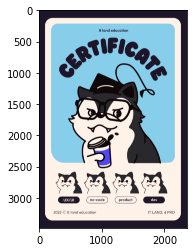

In [282]:
d = build_diploma(
    ["good_DEV", "good_UX/UI"],
    ["bad_PRODUCT", "bad_NO-CODE"],
    "bg_blue", "head_classic", "body_coffee")
plt.imshow(d)

0 222.777@list.ru nan COMMON green ['UX/UI'] ['PRODUCT' 'NO-CODE' 'DEV'] classic laptop
{'ITEM': 'LAPTOP', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'NO', 'DEV': 'NO'}



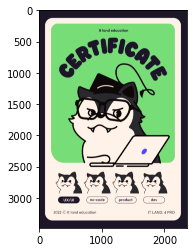

1 aleksandra.iv95@mail.ru Aleksandra Ivasiuk COMMON green ['PRODUCT'] ['UX/UI' 'NO-CODE' 'DEV'] style smoothie
{'ITEM': 'SMOOTHIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'NO', 'PRODUCT': 'YES', 'NO-CODE': 'NO', 'DEV': 'NO'}



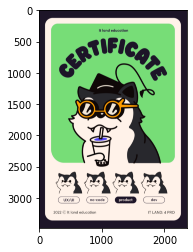

2 alex-rave@yandex.ru nan UNCOMMON blue ['UX/UI' 'NO-CODE'] ['PRODUCT' 'DEV'] classic smoothie
{'ITEM': 'SMOOTHIE', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'BLUE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



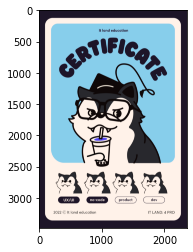

3 anast.shtolz@gmail.com Anastasiia Shtolts RARE yellow ['UX/UI' 'PRODUCT' 'NO-CODE'] ['DEV'] classic coffee
{'ITEM': 'COFFEE', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'YELLOW', 'SERIES': 'WOLF_V1', 'RARITY': 'RARE', 'UX/UI': 'YES', 'PRODUCT': 'YES', 'NO-CODE': 'YES', 'DEV': 'NO'}



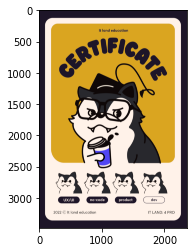

4 andreyvktchebukin@gmail.com nan RARE yellow ['UX/UI' 'NO-CODE' 'DEV'] ['PRODUCT'] classic coffee
{'ITEM': 'COFFEE', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'YELLOW', 'SERIES': 'WOLF_V1', 'RARITY': 'RARE', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'YES'}



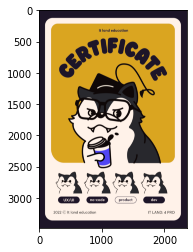

5 denimatthew@gmail.com nan COMMON green ['PRODUCT'] ['UX/UI' 'NO-CODE' 'DEV'] style coffee
{'ITEM': 'COFFEE', 'GLASSES': 'STYLE', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'NO', 'PRODUCT': 'YES', 'NO-CODE': 'NO', 'DEV': 'NO'}



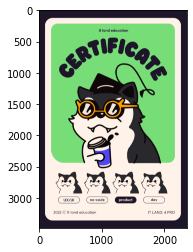

6 derksenod@gmail.com nan UNCOMMON blue ['UX/UI' 'NO-CODE'] ['PRODUCT' 'DEV'] classic phone
{'ITEM': 'PHONE', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'BLUE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



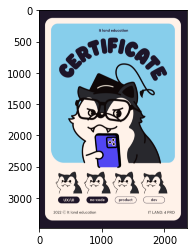

7 dim_an85@list.ru nan UNCOMMON blue ['UX/UI' 'NO-CODE'] ['PRODUCT' 'DEV'] classic smoothie
{'ITEM': 'SMOOTHIE', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'BLUE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



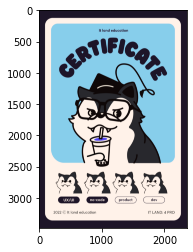

8 envylys@gmail.com nan UNCOMMON blue ['UX/UI' 'NO-CODE'] ['PRODUCT' 'DEV'] classic smoothie
{'ITEM': 'SMOOTHIE', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'BLUE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



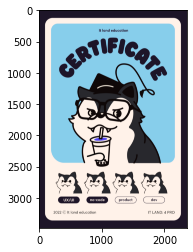

9 gileva_98@mail.ru nan UNCOMMON blue ['UX/UI' 'NO-CODE'] ['PRODUCT' 'DEV'] style hoodie
{'ITEM': 'HOODIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'BLUE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



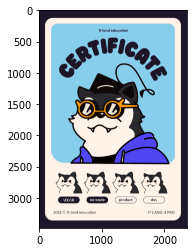

10 yuzbashevgadji@gmail.com nan MYTHIC_RARE orange ['UX/UI' 'PRODUCT' 'NO-CODE' 'DEV'] [] classic phone
{'ITEM': 'PHONE', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'ORANGE', 'SERIES': 'WOLF_V1', 'RARITY': 'MYTHIC_RARE', 'UX/UI': 'YES', 'PRODUCT': 'YES', 'NO-CODE': 'YES', 'DEV': 'YES'}



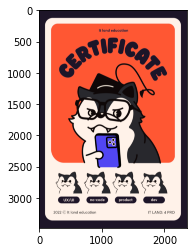

11 h.kudinova@gmail.com nan UNCOMMON blue ['UX/UI' 'NO-CODE'] ['PRODUCT' 'DEV'] classic wok
{'ITEM': 'WOK', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'BLUE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



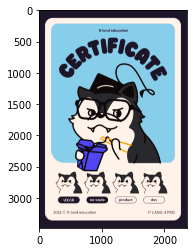

12 ivanskaia.anastasiia@gmail.com nan COMMON green ['NO-CODE'] ['UX/UI' 'PRODUCT' 'DEV'] classic phone
{'ITEM': 'PHONE', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'NO', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



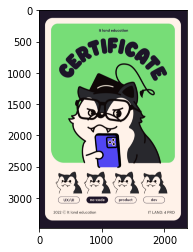

13 iwadim98@ya.ru nan MYTHIC_RARE orange ['UX/UI' 'PRODUCT' 'NO-CODE' 'DEV'] [] classic wok
{'ITEM': 'WOK', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'ORANGE', 'SERIES': 'WOLF_V1', 'RARITY': 'MYTHIC_RARE', 'UX/UI': 'YES', 'PRODUCT': 'YES', 'NO-CODE': 'YES', 'DEV': 'YES'}



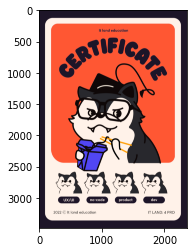

14 jarvany@rambler.ru nan UNCOMMON blue ['UX/UI' 'NO-CODE'] ['PRODUCT' 'DEV'] style hoodie
{'ITEM': 'HOODIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'BLUE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



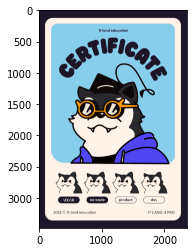

15 khristina.stoyanova@yandex.ru Khristina Stoyanova UNCOMMON blue ['UX/UI' 'NO-CODE'] ['PRODUCT' 'DEV'] classic laptop
{'ITEM': 'LAPTOP', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'BLUE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



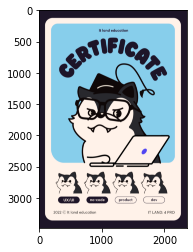

16 kraswal@mail.ru nan COMMON green ['NO-CODE'] ['UX/UI' 'PRODUCT' 'DEV'] style smoothie
{'ITEM': 'SMOOTHIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'NO', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



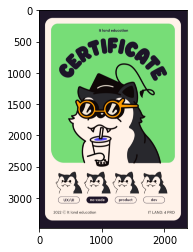

17 krikavtsova1@mail.ru nan RARE yellow ['UX/UI' 'NO-CODE' 'DEV'] ['PRODUCT'] style hoodie
{'ITEM': 'HOODIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'YELLOW', 'SERIES': 'WOLF_V1', 'RARITY': 'RARE', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'YES'}



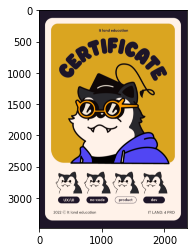

18 leisan.husainova.f@gmail.com nan UNCOMMON blue ['UX/UI' 'NO-CODE'] ['PRODUCT' 'DEV'] style smoothie
{'ITEM': 'SMOOTHIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'BLUE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



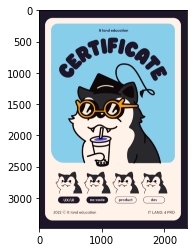

19 leshaarh@gmail.com nan COMMON green ['NO-CODE'] ['UX/UI' 'PRODUCT' 'DEV'] classic coffee
{'ITEM': 'COFFEE', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'NO', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



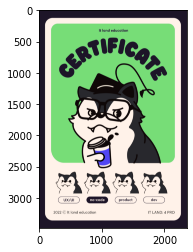

20 lifebringer2@gmail.com nan COMMON green ['UX/UI'] ['PRODUCT' 'NO-CODE' 'DEV'] style laptop
{'ITEM': 'LAPTOP', 'GLASSES': 'STYLE', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'NO', 'DEV': 'NO'}



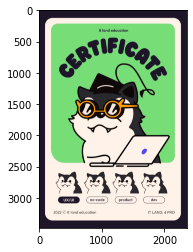

21 liliwolke94@gmail.com nan UNCOMMON blue ['UX/UI' 'NO-CODE'] ['PRODUCT' 'DEV'] classic laptop
{'ITEM': 'LAPTOP', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'BLUE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



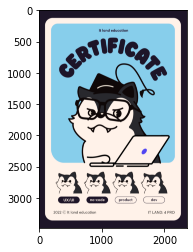

22 litolmalt@gmail.com nan RARE yellow ['UX/UI' 'PRODUCT' 'DEV'] ['NO-CODE'] style hoodie
{'ITEM': 'HOODIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'YELLOW', 'SERIES': 'WOLF_V1', 'RARITY': 'RARE', 'UX/UI': 'YES', 'PRODUCT': 'YES', 'NO-CODE': 'NO', 'DEV': 'YES'}



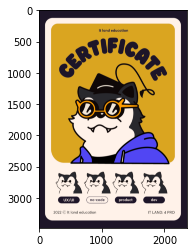

23 lmntrikcs@mail.ru nan RARE yellow ['UX/UI' 'PRODUCT' 'NO-CODE'] ['DEV'] style laptop
{'ITEM': 'LAPTOP', 'GLASSES': 'STYLE', 'BACKGROUND': 'YELLOW', 'SERIES': 'WOLF_V1', 'RARITY': 'RARE', 'UX/UI': 'YES', 'PRODUCT': 'YES', 'NO-CODE': 'YES', 'DEV': 'NO'}



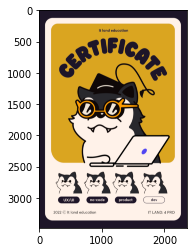

24 matxolikovr@gmail.com nan COMMON green ['UX/UI'] ['PRODUCT' 'NO-CODE' 'DEV'] style wok
{'ITEM': 'WOK', 'GLASSES': 'STYLE', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'NO', 'DEV': 'NO'}



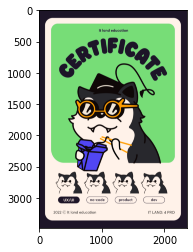

25 Mesenizma@vk.com nan COMMON green ['NO-CODE'] ['UX/UI' 'PRODUCT' 'DEV'] style laptop
{'ITEM': 'LAPTOP', 'GLASSES': 'STYLE', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'NO', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



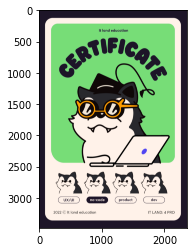

26 natashagut92@gmail.com Natalia Phoenix UNCOMMON_SPECIAL purple ['UX/UI' 'PRODUCT'] ['NO-CODE' 'DEV'] style smoothie
{'ITEM': 'SMOOTHIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'PURPLE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON_SPECIAL', 'UX/UI': 'YES', 'PRODUCT': 'YES', 'NO-CODE': 'NO', 'DEV': 'NO'}



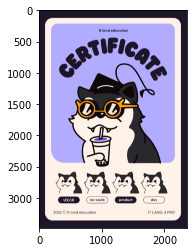

27 olya.bukato@gmail.com Olya RARE yellow ['UX/UI' 'NO-CODE' 'DEV'] ['PRODUCT'] style smoothie
{'ITEM': 'SMOOTHIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'YELLOW', 'SERIES': 'WOLF_V1', 'RARITY': 'RARE', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'YES'}



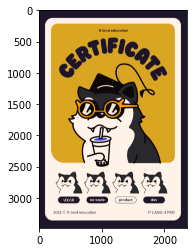

28 Sasha23.041997@mail.ru Aleksandr Pervushin COMMON green ['UX/UI'] ['PRODUCT' 'NO-CODE' 'DEV'] style smoothie
{'ITEM': 'SMOOTHIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'NO', 'DEV': 'NO'}



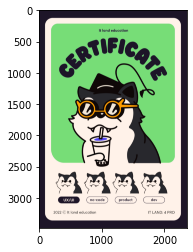

29 smuryginaviktoria@yandex.ru nan UNCOMMON_SPECIAL purple ['UX/UI' 'PRODUCT'] ['NO-CODE' 'DEV'] style smoothie
{'ITEM': 'SMOOTHIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'PURPLE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON_SPECIAL', 'UX/UI': 'YES', 'PRODUCT': 'YES', 'NO-CODE': 'NO', 'DEV': 'NO'}



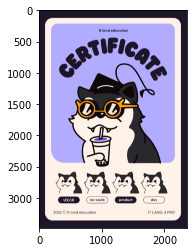

30 tantermax@mail.ru nan COMMON green ['UX/UI'] ['PRODUCT' 'NO-CODE' 'DEV'] classic wok
{'ITEM': 'WOK', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'NO', 'DEV': 'NO'}



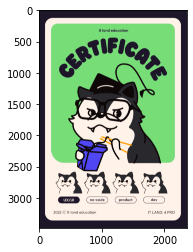

31 tatenja4@gmail.com nan COMMON green ['UX/UI'] ['PRODUCT' 'NO-CODE' 'DEV'] classic phone
{'ITEM': 'PHONE', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'NO', 'DEV': 'NO'}



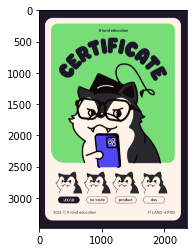

32 tha.smern@gmail.com Artem Smeianov RARE yellow ['UX/UI' 'PRODUCT' 'NO-CODE'] ['DEV'] style coffee
{'ITEM': 'COFFEE', 'GLASSES': 'STYLE', 'BACKGROUND': 'YELLOW', 'SERIES': 'WOLF_V1', 'RARITY': 'RARE', 'UX/UI': 'YES', 'PRODUCT': 'YES', 'NO-CODE': 'YES', 'DEV': 'NO'}



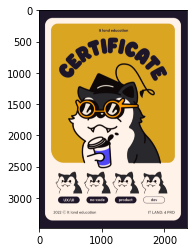

33 tor7216@gmail.com nan COMMON green ['UX/UI'] ['PRODUCT' 'NO-CODE' 'DEV'] style hoodie
{'ITEM': 'HOODIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'NO', 'DEV': 'NO'}



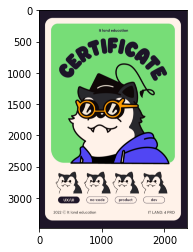

34 trimitron@mail.ru nan UNCOMMON blue ['UX/UI' 'NO-CODE'] ['PRODUCT' 'DEV'] style smoothie
{'ITEM': 'SMOOTHIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'BLUE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



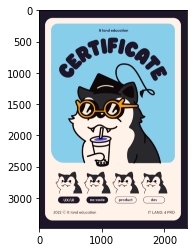

35 ubulyndina@gmail.com Iuliia Bulyndina UNCOMMON_SPECIAL purple ['UX/UI' 'PRODUCT'] ['NO-CODE' 'DEV'] classic laptop
{'ITEM': 'LAPTOP', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'PURPLE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON_SPECIAL', 'UX/UI': 'YES', 'PRODUCT': 'YES', 'NO-CODE': 'NO', 'DEV': 'NO'}



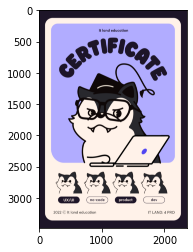

36 vadverybad@mail.ru nan MYTHIC_RARE orange ['UX/UI' 'PRODUCT' 'NO-CODE' 'DEV'] [] style smoothie
{'ITEM': 'SMOOTHIE', 'GLASSES': 'STYLE', 'BACKGROUND': 'ORANGE', 'SERIES': 'WOLF_V1', 'RARITY': 'MYTHIC_RARE', 'UX/UI': 'YES', 'PRODUCT': 'YES', 'NO-CODE': 'YES', 'DEV': 'YES'}



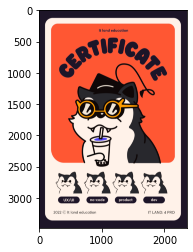

37 Val2301@mail.ru nan MYTHIC_RARE orange ['UX/UI' 'PRODUCT' 'NO-CODE' 'DEV'] [] classic laptop
{'ITEM': 'LAPTOP', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'ORANGE', 'SERIES': 'WOLF_V1', 'RARITY': 'MYTHIC_RARE', 'UX/UI': 'YES', 'PRODUCT': 'YES', 'NO-CODE': 'YES', 'DEV': 'YES'}



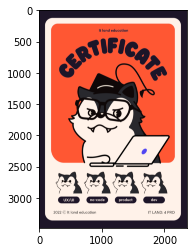

38 valletdeclubs@gmail.com nan UNCOMMON blue ['UX/UI' 'NO-CODE'] ['PRODUCT' 'DEV'] classic coffee
{'ITEM': 'COFFEE', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'BLUE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



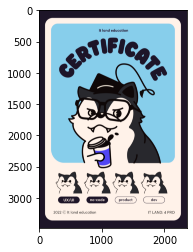

39 vladislava.zubkova@yandex.ru nan UNCOMMON blue ['UX/UI' 'NO-CODE'] ['PRODUCT' 'DEV'] classic coffee
{'ITEM': 'COFFEE', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'BLUE', 'SERIES': 'WOLF_V1', 'RARITY': 'UNCOMMON', 'UX/UI': 'YES', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



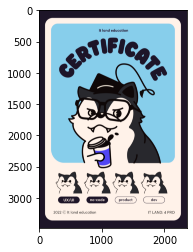

40 whoyagle@gmail.com Gleb Yakubets MYTHIC_RARE orange ['UX/UI' 'PRODUCT' 'NO-CODE' 'DEV'] [] classic coffee
{'ITEM': 'COFFEE', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'ORANGE', 'SERIES': 'WOLF_V1', 'RARITY': 'MYTHIC_RARE', 'UX/UI': 'YES', 'PRODUCT': 'YES', 'NO-CODE': 'YES', 'DEV': 'YES'}



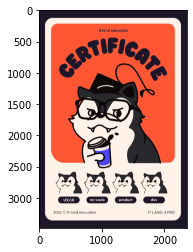

41 yuzhivetyeva@gmail.com nan COMMON green ['NO-CODE'] ['UX/UI' 'PRODUCT' 'DEV'] classic laptop
{'ITEM': 'LAPTOP', 'GLASSES': 'CLASSIC', 'BACKGROUND': 'GREEN', 'SERIES': 'WOLF_V1', 'RARITY': 'COMMON', 'UX/UI': 'NO', 'PRODUCT': 'NO', 'NO-CODE': 'YES', 'DEV': 'NO'}



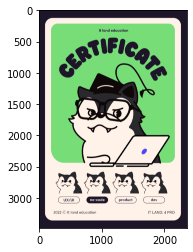

In [349]:
user_attributes = []
mails = []
names = []

for s in students.iterrows():
    i = s[0]
    s = s[1]
    mail = s["Почта"]
    treks = get_treks(s["Направления"])
    name = s["Комментарий"] # name or nan
    trek_attrs = np.array(TREK_ATTR_NAME)[np.where(treks)]
    bad_trek_attrs = np.array([t for t in TREK_ATTR_NAME if t not in trek_attrs])
    rarity = treks_to_rarity(trek_attrs)
    bg_color = RARITY_TO_COLOR[rarity]
    head = HEADS[heads[i]]
    body = BODYS[bodys[i]]
    print(i, mail, name, rarity, bg_color, trek_attrs, bad_trek_attrs, head, body)
    attrs = {}
    attrs["ITEM"] = body.upper()
    attrs["GLASSES"] = head.upper()
    attrs["BACKGROUND"] = bg_color.upper()
    attrs["SERIES"] = "WOLF_V1"
    attrs["RARITY"] = rarity
    check = lambda s: "YES" if s in trek_attrs else "NO"
    for t in TREK_ATTR_NAME:
        attrs[t] = check(t)
        
    user_attributes.append(attrs)
    mails.append(mail)
    names.append(name)
    print(attrs)
    print()
    img = build_diploma(
    ["good_" + c for c in trek_attrs],
    ["bad_" + c for c in bad_trek_attrs],
    "bg_" + bg_color, "head_" + head, "body_" + body)
    plt.imshow(img)
    plt.show()
    plt.imsave("wolfs_gen/{}.png".format(i), img)

In [350]:
df = pd.DataFrame()
df["mails"] = mails
df["names"] = names
df["user_attributes"] = user_attributes
df.to_csv("user_attributes.csv")